In [1]:
import os
dircs=os.listdir('../input/combination/combine/train/')
test_dircs=os.listdir('../input/combination/combine/test/')

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
from PIL import Image
from scipy import misc

import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# DEEP LEARNING IMPORTS
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
X_train_directory=[]
y_train_directory=[]
for directory in dircs:
    image_paths=os.listdir(f'../input/combination/combine/train/{directory}')
    for img_name in image_paths:
        X_train_directory.append(f'../input/combination/combine/train/{directory}/{img_name}')
        y_train_directory.append(directory)

In [4]:
# X_test_directory=[]
# y_test_directory=[]
# for directory in dircs:
#     image_paths=os.listdir(f'../input/combination/combine/test/{directory}')
#     for img_name in image_paths:
#         X_test_directory.append(f'../input/combination/combine/test/{directory}/{img_name}')
#         y_test_directory.append(directory)

In [5]:
df={"trainimages":X_train_directory,"trainlabels":y_train_directory}


In [6]:
# df2={"testimages":X_test_directory,"testlabels":y_test_directory}


In [7]:
import pandas as pd
import numpy as np
df=pd.DataFrame(df)
# df2=pd.DataFrame(df2)

In [8]:
from sklearn.preprocessing import OneHotEncoder
df = df.sample(frac=1).reset_index(drop=True)
onehot=OneHotEncoder()
lab=onehot.fit_transform(df['trainlabels'].values.reshape(-1,1)).toarray()
images=df['trainimages']
len(lab)

1381

In [9]:
# from sklearn.preprocessing import OneHotEncoder
# df2 = df2.sample(frac=1).reset_index(drop=True)
# onehot=OneHotEncoder()
# lab_test=onehot.fit_transform(df2['testlabels'].values.reshape(-1,1)).toarray()
# images_test=df2['testimages']
# len(lab_test)

In [11]:
import cv2
import matplotlib.pyplot as plt
imgs=[]
for img in images:
    if img.startswith("../input/combination/combine/train/white spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)

        # define range of white color in HSV
        # change it according to your need !
        lower_white = np.array([0,0,168], dtype=np.uint8)
        upper_white = np.array([172,111,255],dtype=np.uint8)

        # Threshold the HSV image to get only white colors
        mask = cv2.inRange(hsv, lower_white, upper_white)
        # Bitwise-AND mask and original image
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)
        imgs.append(res)
         
    elif img.startswith("../input/combination/combine/train/red spot/"):
        imag = cv2.imread(img)

        frame = cv2.resize(imag,(224,224)) 

        kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
        image_sharp = cv2.filter2D(src=frame, ddepth=-1, kernel=kernel)
        hsv = cv2.cvtColor(image_sharp,cv2.COLOR_BGR2HSV)

        lower_red = np.array([0,50,50])
        upper_red = np.array([10,255,255])


        #upper red
        lower_red2 = np.array([170,50,50])
        upper_red2 = np.array([180,255,255])

        mask = cv2.inRange(hsv, lower_red, upper_red)
        res = cv2.bitwise_and(image_sharp,image_sharp, mask= mask)


        mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
        res2 = cv2.bitwise_and(image_sharp,image_sharp, mask= mask2)

        img3=res+res2
        imgs.append(img3)
    elif img.startswith("../input/combination/combine/train/black spot/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)
        imagehsv = cv2.cvtColor(image_sharp, cv2.COLOR_BGR2HSV)


        lower_black = np.array([0,0,0])
        upper_black = np.array([179,255,127])

        imagemask = cv2.inRange(imagehsv, lower_black, upper_black)
        result = cv2.bitwise_not(image_sharp,image_sharp, mask=imagemask)

        imgs.append(result)
    elif img.startswith("../input/combination/combine/train/fresh fish/"):
        other_imag = cv2.imread(img)

        other_frame = cv2.resize(other_imag,(224,224))
        kernel = np.array([[0, -1, 0],
               [-1, 5,-1],
               [0, -1, 0]])
        image_sharp = cv2.filter2D(src=other_frame, ddepth=-1, kernel=kernel)

        imgs.append(image_sharp)

In [12]:
X=np.array(imgs)
y_indicator=np.array(lab)


In [13]:
import numpy as np
np.random.seed(32)

In [14]:
X_trainnorm=X/255.0


In [15]:
X_trainnorm.shape

(1381, 224, 224, 3)

In [17]:
y=np.argmax(y_indicator,axis=1)

In [19]:

# MLP for Pima Indians Dataset with 10-fold cross validation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from sklearn.model_selection import StratifiedKFold
import numpy as np

In [21]:
inputs=X_trainnorm
targets=y_indicator

In [22]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import tensorflow
acc_per_fold = []
loss_per_fold = []

history=[]


# Define the K-fold Cross Validator
kfold =KFold(n_splits=3, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(192, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    
    model.add(Dense(352, activation='relu'))
    
    model.add(Dense(4, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
            optimizer=tensorflow.keras.optimizers.Adam(0.0001),
            metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
    history.append(model.fit(inputs[train], targets[train],
          batch_size=16,
          epochs=50,
          validation_data=(inputs[test], targets[test]),
          verbose=1,
          callbacks=[es,mc]
                    ))

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
        print('------------------------------------------------------------------------')
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
        print('------------------------------------------------------------------------')
        print('Average scores for all folds:')
        print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
        print(f'> Loss: {np.mean(loss_per_fold)}')
        print('------------------------------------------------------------------------')

2022-11-25 15:07:13.644219: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:07:13.645636: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:07:13.850715: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:07:13.852108: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 15:07:13.853421: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

------------------------------------------------------------------------
Training for fold 1 ...


2022-11-25 15:07:20.853684: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2022-11-25 15:07:23.174554: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


58/58 [==============================] - 14s 65ms/step - loss: 0.6688 - accuracy: 0.6793 - val_loss: 0.4278 - val_accuracy: 0.8503

Epoch 00001: val_accuracy improved from -inf to 0.85033, saving model to best_model.h5
Epoch 2/50
58/58 [==============================] - 2s 41ms/step - loss: 0.3152 - accuracy: 0.8793 - val_loss: 0.3307 - val_accuracy: 0.8850

Epoch 00002: val_accuracy improved from 0.85033 to 0.88503, saving model to best_model.h5
Epoch 3/50
58/58 [==============================] - 2s 40ms/step - loss: 0.2546 - accuracy: 0.9120 - val_loss: 0.2341 - val_accuracy: 0.9176

Epoch 00003: val_accuracy improved from 0.88503 to 0.91757, saving model to best_model.h5
Epoch 4/50
58/58 [==============================] - 2s 42ms/step - loss: 0.1328 - accuracy: 0.9543 - val_loss: 0.2048 - val_accuracy: 0.9176

Epoch 00004: val_accuracy did not improve from 0.91757
Epoch 5/50
58/58 [==============================] - 2s 43ms/step - loss: 0.0823 - accuracy: 0.9739 - val_loss: 0.1953 - 

In [23]:
print(history[0].history['accuracy'])

[0.679347813129425, 0.8793478012084961, 0.9119565486907959, 0.9543478488922119, 0.9739130139350891, 0.977173924446106, 0.981521725654602, 0.9934782385826111, 0.9847826361656189, 0.9923912882804871, 0.991304337978363, 0.968478262424469]


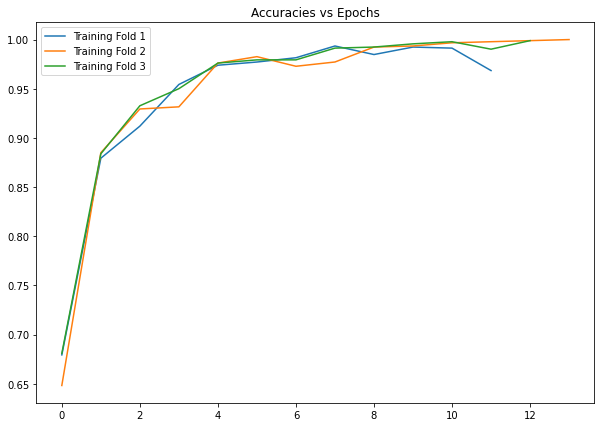

In [24]:

plt.title('Accuracies vs Epochs')
plt.plot(history[0].history['accuracy'], label='Training Fold 1')
plt.plot(history[1].history['accuracy'], label='Training Fold 2')
plt.plot(history[2].history['accuracy'], label='Training Fold 3')

plt.legend()
plt.show()

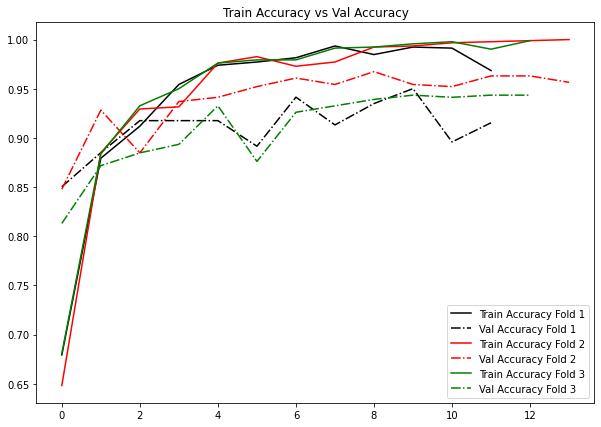

In [25]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(history[0].history['accuracy'], label='Train Accuracy Fold 1', color='black')
plt.plot(history[0].history['val_accuracy'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(history[1].history['accuracy'], label='Train Accuracy Fold 2', color='red', )
plt.plot(history[1].history['val_accuracy'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(history[2].history['accuracy'], label='Train Accuracy Fold 3', color='green', )
plt.plot(history[2].history['val_accuracy'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

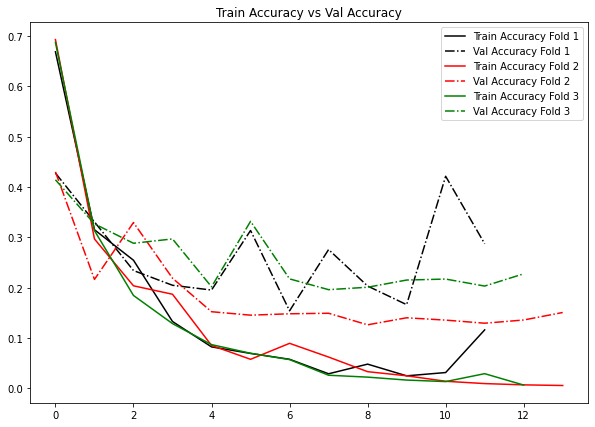

In [27]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(history[0].history['loss'], label='Train Accuracy Fold 1', color='black')
plt.plot(history[0].history['val_loss'], label='Val Accuracy Fold 1', color='black', linestyle = "dashdot")
plt.plot(history[1].history['loss'], label='Train Accuracy Fold 2', color='red', )
plt.plot(history[1].history['val_loss'], label='Val Accuracy Fold 2', color='red', linestyle = "dashdot")
plt.plot(history[2].history['loss'], label='Train Accuracy Fold 3', color='green', )
plt.plot(history[2].history['val_loss'], label='Val Accuracy Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x_scaled, test_images_y_encoded)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
from bayes_opt import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [ ]:
score_acc = make_scorer(accuracy_score)

In [ ]:
y_train_norm=np.argmax(train_y,axis=1)

In [ ]:
y_train_norm.shape

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [ ]:
# def build_model(hp):
#     # create model object
#     model = keras.Sequential([
#     #adding first convolutional layer    
#     keras.layers.Conv2D(
#         #adding filter 
#         filters=hp.Int('conv_1_filter', min_value=64, max_value=256, step=32,default=128),
#         # adding filter size or kernel size
#         kernel_size=hp.Choice('conv_1_kernel', values = [3]),
#         #activation function
#         activation='relu',
#         input_shape=(224,224,3)),
#     # adding second convolutional layer 
   
#     # adding flatten layer    
#     keras.layers.Flatten(),
#     # adding dense layer    
# #     keras.layers.Dense(
# #         units=352,
# #         activation='relu'
# #     ),
#     # output layer    
#     keras.layers.Dense(4, activation='softmax')
#     ])
#     #compilation of model
#     model.compile(optimizer=keras.optimizers.Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
#     return model

In [ ]:
import keras_tuner as kt
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = keras.Sequential()
        
        model.add(layers.Flatten())
        model.add(
            layers.Dense(
                units=352,
                activation="relu",
            )
        )
        model.add(layers.Dense(4, activation="softmax"))
        model.compile(
            optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"],
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            epochs=hp.Choice("epochs", [30, 50,100]),
            batch_size=hp.Choice("batch_size", [16]),
            **kwargs,
        )

tuner = kt.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [ ]:
import tensorflow as tf
tuner.search(X_trainnorm, train_y,validation_data=(X_testnorm, test_y), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])

In [ ]:
tuner.results_summary()

In [ ]:
# asadfafaf
# asfsaftuner = RandomSearch(
#     build_model,
#     objective = 'val_accuracy',
#     max_trials = 5,
#     executions_per_trial = 3,
# )

In [ ]:
tuner.search_space_summary()

In [ ]:
tuner.search(X_trainnorm, train_y, , epochs=30, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3), validation_data=(X_testnorm, test_y))

###Range 8-32
Results summary
Results in ./untitled_project
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7f42b87267d0>
Trial summary
Hyperparameters:
conv_1_filter: 24
conv_1_kernel: 3
Score: 0.9065510630607605
Trial summary
Hyperparameters:
conv_1_filter: 28
conv_1_kernel: 5
Score: 0.9036608934402466
Trial summary
Hyperparameters:
conv_1_filter: 20
conv_1_kernel: 3
Score: 0.8988439242045084
Trial summary
Hyperparameters:
conv_1_filter: 8
conv_1_kernel: 5
Score: 0.8978805541992188
Trial summary
Hyperparameters:
conv_1_filter: 16
conv_1_kernel: 3
Score: 0.892100195089976

range 32-64

Results summary
Results in ./untitled_project
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7fc272cedb50>
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 5
Score: 0.9315992395083109
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 3
Score: 0.9277456601460775
Trial summary
Hyperparameters:
conv_1_filter: 32
conv_1_kernel: 5
Score: 0.9219653209050497
Trial summary
Hyperparameters:
conv_1_filter: 64
conv_1_kernel: 3
Score: 0.9190751512845358
Trial summary
Hyperparameters:
conv_1_filter: 48
conv_1_kernel: 5
Score: 0.910404622554779

range 64-256
Results summary
Results in ./untitled_project
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7f0932fb6210>
Trial summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel: 5
Score: 0.9364161888758341
Trial summary
Hyperparameters:
conv_1_filter: 224
conv_1_kernel: 5
Score: 0.9335260192553202
Trial summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel: 3
Score: 0.9306358496348063
Trial summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel: 5
Score: 0.9248554706573486
Trial summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel: 3
Score: 0.9248554706573486

#### Batch size

Results summary
Results in my_dir/tune_hypermodel
Showing 10 best trials
<keras_tuner.engine.objective.Objective object at 0x7fe4d40fad90>
Trial summary
Hyperparameters:
batch_size: 16
Score: 0.7832369804382324
Trial summary
Hyperparameters:
batch_size: 16
Score: 0.7543352842330933
Trial summary
Hyperparameters:
batch_size: 32
Score: 0.5057803392410278

In [ ]:
tuner.results_summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense